<a href="https://colab.research.google.com/github/Fardeen210/Fardeen_INFO5731_Fall2024/blob/main/Copy_of_Text_classification_and_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TEXT CLASSIFICATION**

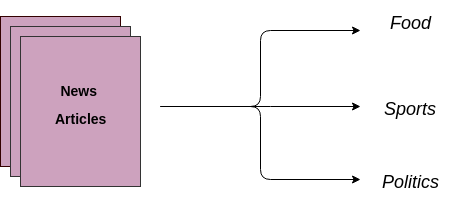

# **Dataset : EDA**

In [ ]:
import pandas as pd

df =pd.read_csv("/content/drive/MyDrive/Dataset/IMDB Dataset.csv")
df.head(-10)

,Unnamed: 0,review,sentiment,cleaned_Review
0,0,One of the other reviewers has mentioned that ...,positive,"['one', 'other', 'reviewers', 'mentioned', 'af..."
1,1,A wonderful little production. <br /><br />The...,positive,"['wonderful', 'little', 'production', 'filming..."
2,2,I thought this was a wonderful way to spend ti...,positive,"['thought', 'wonderful', 'way', 'spend', 'time..."
3,3,Basically there's a family where a little boy ...,negative,"['basically', ""there's"", 'family', 'where', 'l..."
4,4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"['petter', ""mattei's"", 'love', 'in', 'time', '..."
...,...,...,...,...
49985,49985,Imaginary Heroes is clearly the best film of t...,positive,"['imaginary', 'heroes', 'clearly', 'best', 'fi..."
49986,49986,This movie is a disgrace to the Major League F...,negative,"['movie', 'disgrace', 'major', 'league', 'fran..."
49987,49987,A remake of Alejandro Amenabar's Abre los Ojos...,negative,"['remake', 'alejandro', ""amenabar's"", 'abre', ..."
49988,49988,"When I first tuned in on this morning news, I ...",negative,"['when', 'first', 'tuned', 'in', 'on', 'mornin..."


In [ ]:
df.describe()

,Unnamed: 0
count,50000.000000
mean,24999.500000
std,14433.901067
min,0.000000
25%,12499.750000
50%,24999.500000
75%,37499.250000
max,49999.000000


In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
review,0
sentiment,0
cleaned_Review,0


#**Text classification using Tradational Machine Learning**

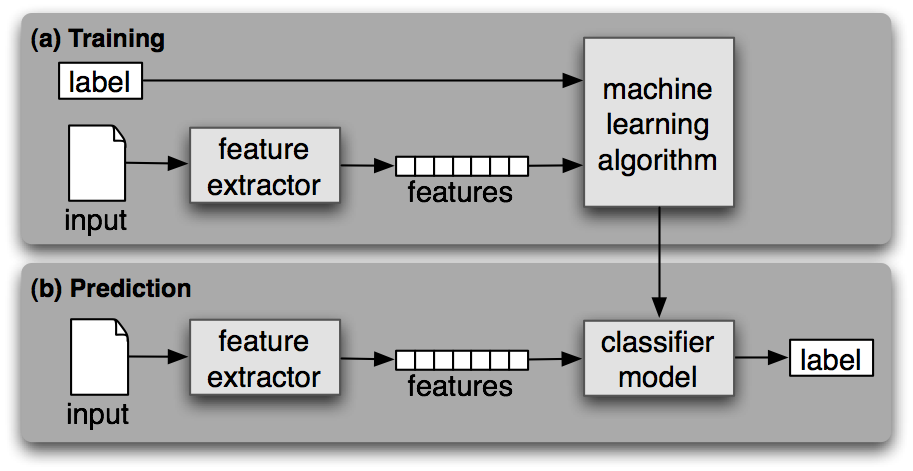

**Precision** Definition: Out of all the texts the model predicted as a certain class, how many were actually correct

**Recall** Definition: Out of all the texts that actually belong to a class, how many did the model correctly identify?

**F1-Score** Definition: The harmonic mean of precision and recall. A balance between them.

# Naive bayes Classifier

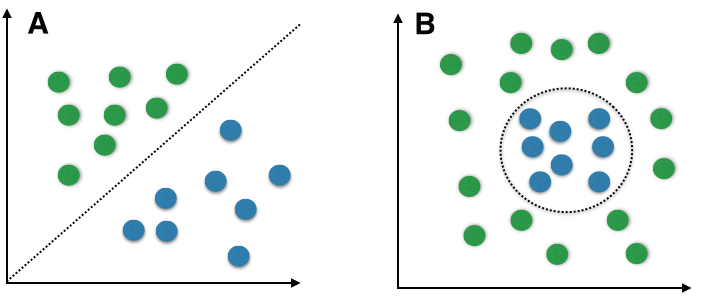

1. Import Libraries and Load Data:

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn import metrics

new_df = df.sample(n=1000)

# Define the feature (X) and target (y) variables
X = new_df['cleaned_Review']  # Text data
y = new_df['sentiment']         # Labels

# Step 3: Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Create a pipeline with CountVectorizer, TfidfTransformer, and Multinomial Naive Bayes Classifier
text_clf = Pipeline([
    ('vect', CountVectorizer(stop_words='english')),     # CountVectorizer to convert text to token counts
    ('tfidf', TfidfTransformer()),                       # TfidfTransformer to apply TF-IDF weighting
    ('clf', MultinomialNB()),                            # Multinomial Naive Bayes classifier
])

# Step 5: Train the model
text_clf.fit(X_train, y_train)

# Step 6: Make predictions on the test set
y_pred = text_clf.predict(X_test)

# Step 7: Evaluate the model
# Print the classification report
print(metrics.classification_report(y_test, y_pred))

# Print the model accuracy
print(f"Accuracy: {metrics.accuracy_score(y_test, y_pred)}")

              precision    recall  f1-score   support

    negative       0.66      0.92      0.77        86
    positive       0.91      0.64      0.75       114

    accuracy                           0.76       200
   macro avg       0.79      0.78      0.76       200
weighted avg       0.80      0.76      0.76       200

Accuracy: 0.76


# KNeighbors Classifier

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier

text_clf = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', min_df=5)),  # TF-IDF vectorization
    ('clf', KNeighborsClassifier(n_neighbors=5)),  # KNN Classifier with 5 neighbors
])

text_clf.fit(X_train, y_train)

y_pred = text_clf.predict(X_test)

print(metrics.classification_report(y_test, y_pred))
# Print the model accuracy
print(f"Accuracy: {metrics.accuracy_score(y_test, y_pred)}")


              precision    recall  f1-score   support

    negative       0.66      0.71      0.69        86
    positive       0.77      0.73      0.75       114

    accuracy                           0.72       200
   macro avg       0.72      0.72      0.72       200
weighted avg       0.72      0.72      0.72       200

Accuracy: 0.72


# Decision tree classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create a pipeline with TF-IDF vectorizer and Decision Tree Classifier
text_clf = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', min_df=5)),  # Convert text to TF-IDF features
    ('clf', DecisionTreeClassifier(random_state=42))  # Decision Tree Classifier
])

# Step 5: Train the model
text_clf.fit(X_train, y_train)

# Step 6: Make predictions on the test set
y_pred = text_clf.predict(X_test)

# Step 7: Evaluate the model
# Print classification report
print(metrics.classification_report(y_test, y_pred))

# Print model accuracy
print(f"Accuracy: {metrics.accuracy_score(y_test, y_pred)}")

              precision    recall  f1-score   support

    negative       0.58      0.62      0.60        86
    positive       0.70      0.67      0.68       114

    accuracy                           0.65       200
   macro avg       0.64      0.64      0.64       200
weighted avg       0.65      0.65      0.65       200

Accuracy: 0.645


# Random Forest Classifier

In [ ]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier

# Step 4: Create a pipeline with TF-IDF and Random Forest Classifier
text_clf = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', min_df=5)),  # TF-IDF vectorization
    ('clf', RandomForestClassifier(n_estimators=100, random_state=42)),  # Random Forest Classifier
])

# Step 5: Train the model
text_clf.fit(X_train, y_train)

# Step 6: Make predictions on the test set
y_pred = text_clf.predict(X_test)

# Step 7: Evaluate the model
# Print the classification report
print(metrics.classification_report(y_test, y_pred))

# Print the model accuracy
print(f"Accuracy: {metrics.accuracy_score(y_test, y_pred)}")


              precision    recall  f1-score   support

    negative       0.73      0.83      0.78        86
    positive       0.85      0.77      0.81       114

    accuracy                           0.80       200
   macro avg       0.79      0.80      0.79       200
weighted avg       0.80      0.80      0.80       200

Accuracy: 0.795


#Bert

In [ ]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification, BertConfig


from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split


from torch.optim import AdamW
from tqdm import tqdm


from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score
import numpy as np
from sklearn.preprocessing import label_binarize
from torch.nn.functional import softmax
from transformers import get_linear_schedule_with_warmup
from imblearn.over_sampling import RandomOverSampler  # Import oversampling method


# Initialize the tokenizer and the BERT model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Configure the BERT model, increase dropout rate, and set the num_labels parameter
config = BertConfig.from_pretrained('bert-base-uncased', num_labels=len(set(labels)))
config.hidden_dropout_prob = 0.3  # Default is 0.1
config.attention_probs_dropout_prob = 0.3

# Use the configuration to initialize the model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', config=config)

# Create a Dataset class
class TextDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = self.labels[idx]
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',
        )
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

# Set up data loading
max_len = 128
batch_size = 16

# Split the data into training, validation, and test sets
train_texts, temp_texts, train_labels, temp_labels = train_test_split(texts, labels, test_size=0.2, random_state=42)
val_texts, test_texts, val_labels, test_labels = train_test_split(temp_texts, temp_labels, test_size=0.5, random_state=42)

# Use RandomOverSampler for oversampling
ros = RandomOverSampler(random_state=42)
train_texts_resampled, train_labels_resampled = ros.fit_resample(np.array(train_texts).reshape(-1, 1), train_labels)
train_texts_resampled = train_texts_resampled.flatten()

# Rebuild the training dataset
train_dataset_resampled = TextDataset(train_texts_resampled, train_labels_resampled, tokenizer, max_len)
train_loader_resampled = DataLoader(train_dataset_resampled, batch_size=batch_size, shuffle=True)

# Validation set remains unchanged
val_dataset = TextDataset(val_texts, val_labels, tokenizer, max_len)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

# Create a test dataset and dataloader
test_dataset = TextDataset(test_texts, test_labels, tokenizer, max_len)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

# Use weight decay and learning rate scheduler
optimizer = AdamW(model.parameters(), lr=2e-5, weight_decay=1e-2)

epochs = 3
total_steps = len(train_loader_resampled) * epochs

scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps=total_steps
)

# Early stopping variables
early_stopping_patience = 10  # Increase patience value
best_val_loss = float('inf')
early_stopping_counter = 0
best_model_path = 'best_model.pt'

def calculate_metrics(logits, labels, num_classes):
    # Convert logits to probabilities
    probs = softmax(torch.tensor(logits), dim=1).numpy()

    # Calculate predicted labels
    preds = np.argmax(probs, axis=1)

    # Calculate accuracy, F1, precision
    accuracy = accuracy_score(labels, preds)
    f1 = f1_score(labels, preds, average='weighted')
    precision = precision_score(labels, preds, average='weighted')

    # AUC requires binarizing the labels
    labels_binarized = label_binarize(labels, classes=[i for i in range(num_classes)])
    auc = roc_auc_score(labels_binarized, probs, multi_class='ovo', average='weighted')

    return accuracy, f1, precision, auc

def train_epoch(model, data_loader, optimizer, device, scheduler, num_classes):
    model.train()
    losses = []
    preds_all = []
    labels_all = []
    for d in tqdm(data_loader):
        input_ids = d["input_ids"].to(device)
        attention_mask = d["attention_mask"].to(device)
        labels = d["labels"].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        logits = outputs.logits

        preds_all.extend(logits.detach().cpu().numpy())
        labels_all.extend(labels.cpu().numpy())

        losses.append(loss.item())
        loss.backward()
        optimizer.step()
        scheduler.step()  # Update learning rate
        optimizer.zero_grad()

    accuracy, f1, precision, auc = calculate_metrics(preds_all, labels_all, num_classes)
    return accuracy, f1, precision, auc, np.mean(losses)

def eval_model(model, data_loader, device, num_classes):
    model.eval()
    losses = []
    preds_all = []
    labels_all = []
    with torch.no_grad():
        for d in tqdm(data_loader):
            input_ids = d["input_ids"].to(device)
            attention_mask = d["attention_mask"].to(device)
            labels = d["labels"].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            logits = outputs.logits

            preds_all.extend(logits.cpu().numpy())
            labels_all.extend(labels.cpu().numpy())

            losses.append(loss.item())

    accuracy, f1, precision, auc = calculate_metrics(preds_all, labels_all, num_classes)
    return accuracy, f1, precision, auc, np.mean(losses)

num_classes = len(set(labels))

# Training loop with early stopping and over-sampled data
for epoch in range(epochs):
    print(f"Epoch {epoch+1}/{epochs}")

    train_acc, train_f1, train_precision, train_auc, train_loss = train_epoch(model, train_loader_resampled, optimizer, device, scheduler, num_classes)
    print(f"Train Loss: {train_loss}, Accuracy: {train_acc}, F1: {train_f1}, Precision: {train_precision}, AUC: {train_auc}")

    val_acc, val_f1, val_precision, val_auc, val_loss = eval_model(model, val_loader, device, num_classes)
    print(f"Validation Loss: {val_loss}, Accuracy: {val_acc}, F1: {val_f1}, Precision: {val_precision}, AUC: {val_auc}")

    # Check for early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        early_stopping_counter = 0
        torch.save(model.state_dict(), best_model_path)  # Save the best model
        print("Best model saved")
    else:
        early_stopping_counter += 1
        print(f"Early stopping counter: {early_stopping_counter}/{early_stopping_patience}")

    if early_stopping_counter >= early_stopping_patience:
        print("Early stopping triggered")
        break

# Load the best model before testing
model.load_state_dict(torch.load(best_model_path))
model.to(device)

# Evaluate on the test set
test_acc, test_f1, test_precision, test_auc, test_loss = eval_model(model, test_loader, device, num_classes)
print(f"Test Loss: {test_loss}, Accuracy: {test_acc}, F1: {test_f1}, Precision: {test_precision}, AUC: {test_auc}")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3


100%|██████████| 970/970 [05:18<00:00,  3.05it/s]
<ipython-input-22-fbb5061ae433>:110: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  probs = softmax(torch.tensor(logits), dim=1).numpy()


Train Loss: 1.500268576378675, Accuracy: 0.3208507895584918, F1: 0.31382457614777787, Precision: 0.31091727997027935, AUC: 0.6442517164213439


100%|██████████| 58/58 [00:07<00:00,  8.10it/s]


Validation Loss: 1.5293255859407886, Accuracy: 0.17494600431965443, F1: 0.1653574683421341, Precision: 0.3628978159229361, AUC: 0.5662177828104139
Best model saved
Epoch 2/3


100%|██████████| 970/970 [05:20<00:00,  3.03it/s]


Train Loss: 1.1236265141939379, Accuracy: 0.5151788591685466, F1: 0.4905834168717281, Precision: 0.483184128671349, AUC: 0.8037973267997486


100%|██████████| 58/58 [00:07<00:00,  8.13it/s]


Validation Loss: 1.5553195209338748, Accuracy: 0.24622030237580994, F1: 0.2639605266178606, Precision: 0.364470102244394, AUC: 0.561376255976219
Early stopping counter: 1/10
Epoch 3/3


100%|██████████| 970/970 [05:20<00:00,  3.03it/s]


Train Loss: 0.8752791311323028, Accuracy: 0.614502094747019, F1: 0.5971347876380598, Precision: 0.5916629421961126, AUC: 0.8671731763123833


100%|██████████| 58/58 [00:07<00:00,  8.08it/s]
<ipython-input-22-fbb5061ae433>:202: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(best_mode

Validation Loss: 1.5391420906987683, Accuracy: 0.27429805615550756, F1: 0.29209576294458744, Precision: 0.3652410983057447, AUC: 0.5608303515548623
Early stopping counter: 2/10


100%|██████████| 58/58 [00:06<00:00,  8.45it/s]

Test Loss: 1.524572238839906, Accuracy: 0.19525350593311758, F1: 0.19545453153594805, Precision: 0.4525848016986235, AUC: 0.583100751167311


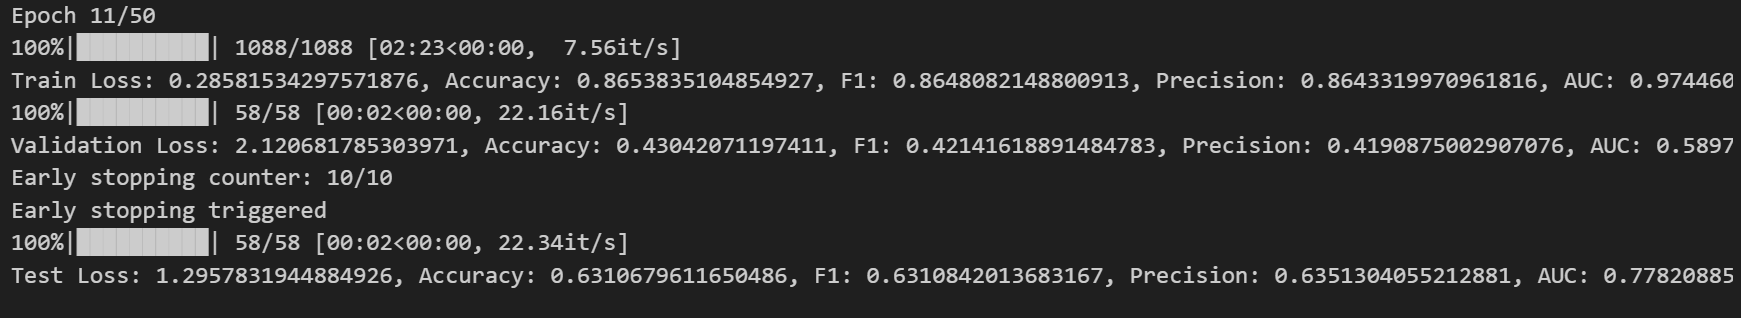

How to improve performance:

Solve the data imbalance problem

1. Resampling Techniques
2. Use Class Weights
3. Ensemble Methods
4. Generate Synthetic Data with Advanced Techniques
5. Anomaly Detection Algorithms
6. Evaluation Metrics for Imbalanced Data

**Text Clustering:**

Text clustering is the process of grouping similar documents together based on their content. By clustering text, we can identify patterns and trends that would otherwise be difficult to discern.



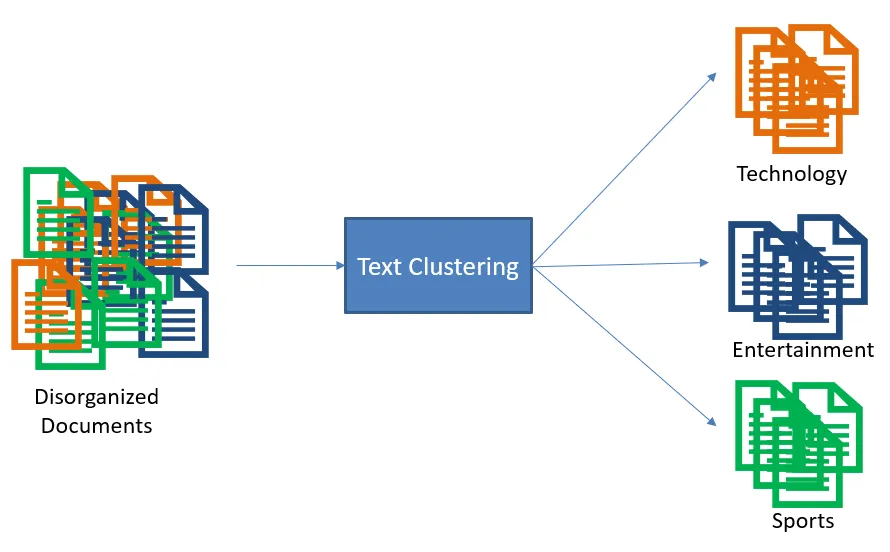

# Kmeans clustering

In [ ]:
!pip install nbconvert
!jupyter nbconvert --clear-output --inplace your_notebook.ipynb

In [ ]:
# Step 1: Load the data
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/MarcusChong123/Text-Clustering-with-Python/master/Movies_Dataset.csv")
df.head()

,id,title,overview
0,0,Toy Story,"Led by Woody, Andy's toys live happily in his ..."
1,1,Jumanji,When siblings Judy and Peter discover an encha...
2,2,Grumpier Old Men,A family wedding reignites the ancient feud be...
3,3,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom..."
4,4,Father of the Bride Part II,Just when George Banks has recovered from his ...


In [ ]:
# Step 2: Explore the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        45466 non-null  int64 
 1   title     45460 non-null  object
 2   overview  44507 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


In [ ]:
# Step 3: Data preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

documents = df['overview'].values.astype("U")

vectorizer = TfidfVectorizer(stop_words='english')
features = vectorizer.fit_transform(documents)

k = 20
# Step 4: KMeans Clustering
model = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
model.fit(features)

df['cluster'] = model.labels_

df.head()

,id,title,overview,cluster
0,0,Toy Story,"Led by Woody, Andy's toys live happily in his ...",16
1,1,Jumanji,When siblings Judy and Peter discover an encha...,2
2,2,Grumpier Old Men,A family wedding reignites the ancient feud be...,10
3,3,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",18
4,4,Father of the Bride Part II,Just when George Banks has recovered from his ...,16


In [ ]:
print("Cluster centroids: \n")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

for i in range(k):
    print("Cluster %d:" % i)
    for j in order_centroids[i, :10]: #print out 10 feature terms of each cluster
        print (' %s' % terms[j])
    print('------------')

Cluster centroids: 

Cluster 0:
 men
 young
 women
 lives
 life
 story
 man
 woman
 world
 love
------------
Cluster 1:
 family
 home
 life
 father
 son
 young
 mother
 man
 house
 old
------------
Cluster 2:
 woman
 young
 husband
 man
 life
 finds
 love
 married
 beautiful
 son
------------
Cluster 3:
 overview
 world
 young
 story
 documentary
 time
 wife
 people
 finds
 years
------------
Cluster 4:
 group
 people
 friends
 young
 world
 small
 students
 story
 lives
 island
------------
Cluster 5:
 man
 young
 wife
 life
 old
 finds
 story
 death
 daughter
 world
------------
Cluster 6:
 nan
 franchi
 fray
 frayed
 fraying
 frayn
 frazer
 frazier
 frazzled
 freak
------------
Cluster 7:
 old
 father
 town
 year
 mother
 girl
 boy
 son
 small
 young
------------
Cluster 8:
 earth
 planet
 space
 alien
 aliens
 human
 crew
 race
 world
 humans
------------
Cluster 9:
 friends
 best
 old
 life
 family
 time
 night
 lives
 college
 young
------------
Cluster 10:
 murder
 police
 case


# **Elbow Method for Optimal k**

📌 What is the Elbow Method?
The Elbow Method helps identify the value of k (number of clusters) at which adding more clusters doesn’t give much better modeling of the data — like diminishing returns.

📊 How It Works (Step-by-Step):
Run K-Means clustering on your dataset for a range of k values (e.g., from 1 to 10).

For each value of k, calculate the within-cluster sum of squares (WCSS) — a measure of how tight the clusters are.

Plot k vs. WCSS.

Look for the "elbow point" — where the WCSS curve starts to flatten.
That’s your optimal k.



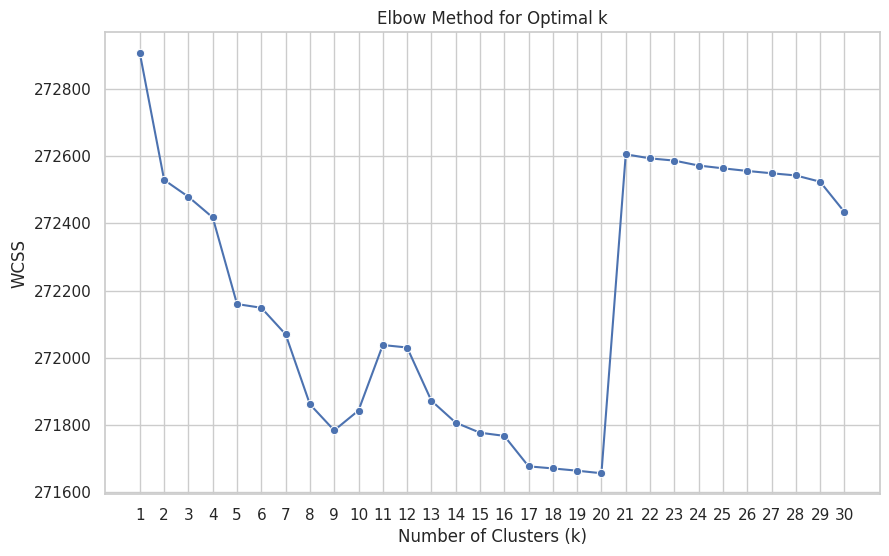

In [ ]:
from sklearn.preprocessing import MaxAbsScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Assuming 'features' is TF-IDF or sparse matrix data from vectorization
scaler = MaxAbsScaler()
scaled_features = scaler.fit_transform(features)  # Scales the sparse matrix without centering

# Calculate WCSS for a range of cluster numbers
wcss = []
ks = list(range(1, 31))  # Using a range from 1 to 30 for more options

for i in ks:
    clustering = KMeans(n_clusters=i, init='k-means++', random_state=42)
    clustering.fit(scaled_features)  # Fit the model on scaled features
    wcss.append(clustering.inertia_)

# Plot the elbow graph using seaborn
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.lineplot(x=ks, y=wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.xticks(ks)  # Show all the k values on the x-axis
plt.grid(True)
plt.show()


**silhouette Score:** Measures how similar an object is to its own cluster vs. others.

📊 **Silhouette Score Recap**:
Ranges from -1 to 1

Closer to 1: well-separated, dense clusters

Around 0: overlapping clusters or poor separation

Below 0: samples assigned to the wrong cluster

In [ ]:
from sklearn.metrics import silhouette_score

for i in range(2, 10):
    clustering = KMeans(n_clusters=i, random_state=42)
    clustering.fit(scaled_features)
    score = silhouette_score(scaled_features, clustering.labels_)
    print(f"Silhouette score for k={i}: {score}")

Silhouette score for k=2: 0.0008869645958970118
Silhouette score for k=3: 0.0007271538814726872
Silhouette score for k=4: 0.0014651314302052232
Silhouette score for k=5: 0.0007292488947468084
Silhouette score for k=6: -0.027334114104727917
Silhouette score for k=7: -0.02718859262167149
Silhouette score for k=8: 0.00019046364274803525
Silhouette score for k=9: -1.98112468043488e-05


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# DBSCAN clustering

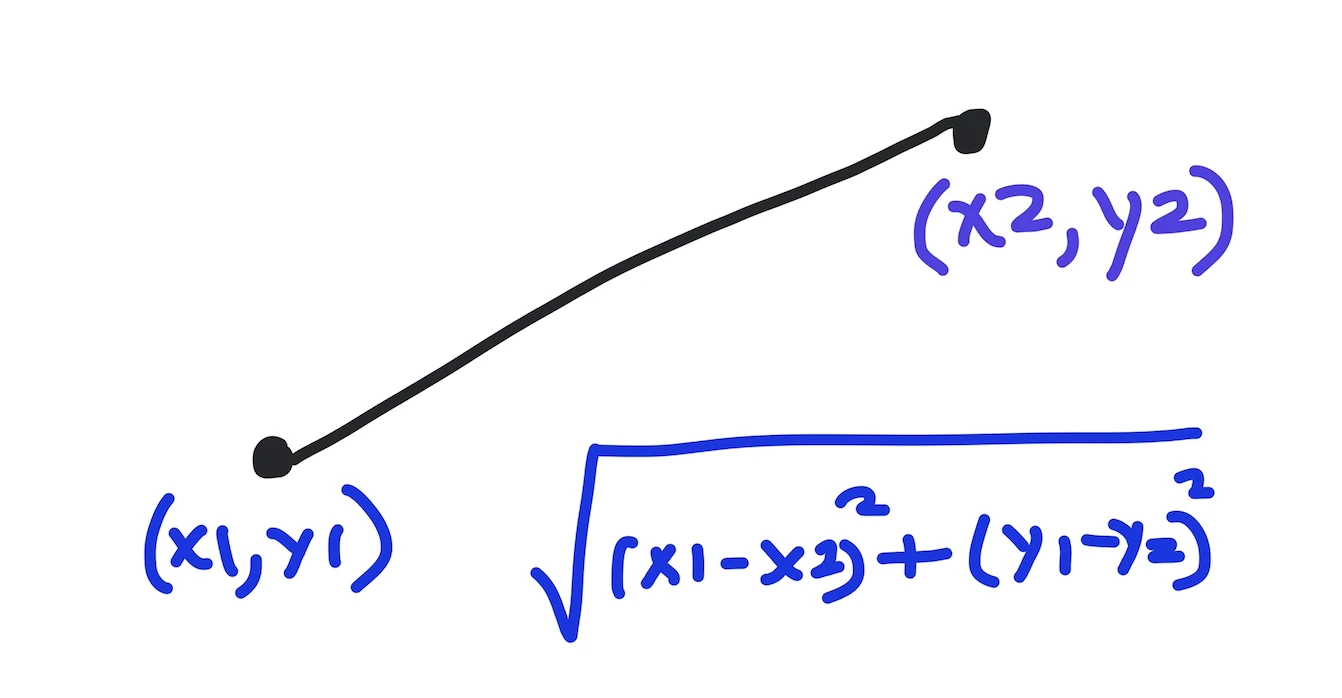

In [ ]:
from sklearn.cluster import DBSCAN

#DBSCAN without any parameter optimization and see the results.
dbscan=DBSCAN(eps=2.3, min_samples=2, metric='euclidean', n_jobs=-1)
model = dbscan.fit(features)


In [ ]:
df['DBSCAN_labels'] = model.labels_

In [ ]:
df['DBSCAN_labels'].unique()

array([0])

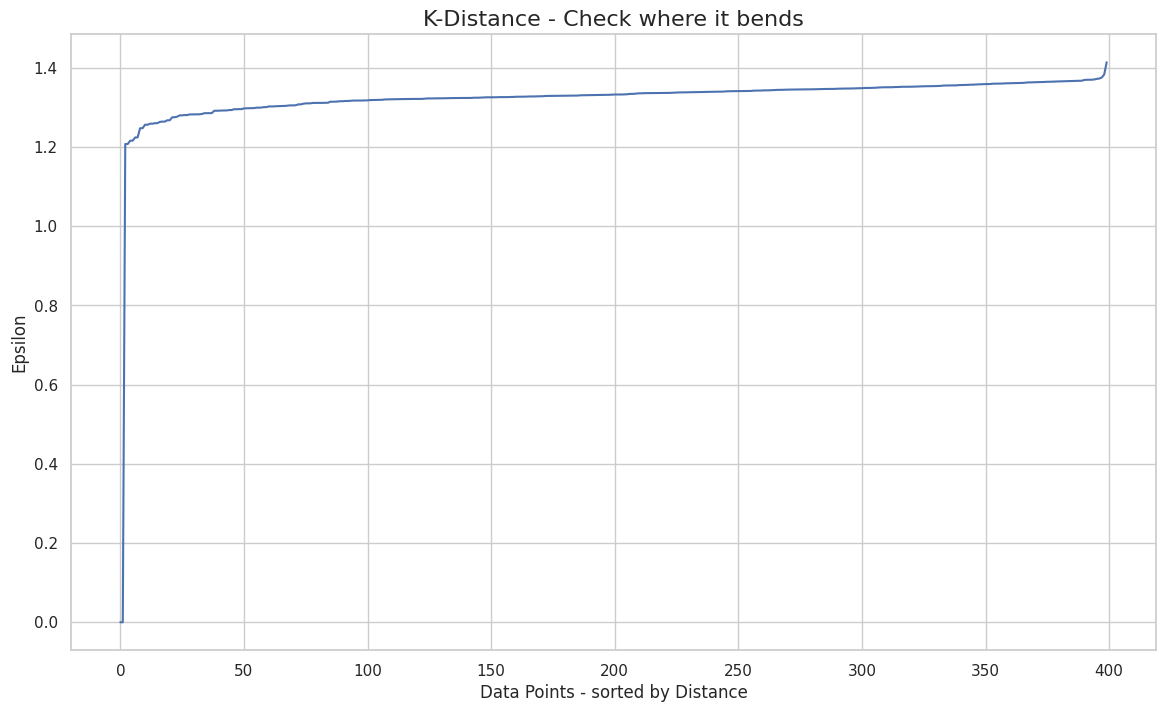

In [ ]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(features)
distances, indices = nbrs.kneighbors(features)

# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(14,8))
plt.plot(distances)
plt.title('K-Distance - Check where it bends',fontsize=16)
plt.xlabel('Data Points - sorted by Distance',fontsize=12)
plt.ylabel('Epsilon',fontsize=12)
plt.show()

In [ ]:
dbscan = DBSCAN(eps=1.3, min_samples=4, metric='euclidean', n_jobs=-1)
model = dbscan.fit(features)

In [ ]:
df['DBSCAN_labels'] = model.labels_
df['DBSCAN_labels'].unique()

array([-1,  1,  0])

Unique labels: [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24]


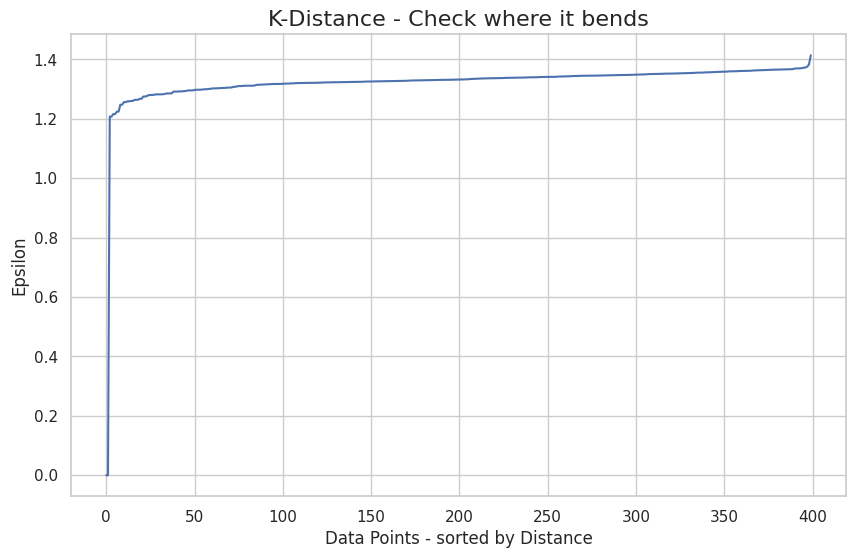

Unique labels after fitting DBSCAN: [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24]


In [ ]:
# Import necessary libraries
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Fit DBSCAN without any parameter optimization and use the results
# Replace 'features' with your actual feature matrix (e.g., scaled TF-IDF features)
dbscan = DBSCAN(eps=1.3, min_samples=2, metric='euclidean', n_jobs=-1)
model = dbscan.fit(features)

# Step 2: Get cluster labels
dbscan_labels = model.labels_
print(f"Unique labels: {np.unique(dbscan_labels)}")

# Step 3: Create the K-distance graph to determine optimal 'eps'
# This helps identify the value of 'eps' where the curve bends ("elbow")
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(features)
distances, indices = nbrs.kneighbors(features)

# Step 4: Sort distances for the k-distance graph
distances = np.sort(distances, axis=0)
distances = distances[:, 1]

# Step 5: Plot the K-distance graph
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('K-Distance - Check where it bends', fontsize=16)
plt.xlabel('Data Points - sorted by Distance', fontsize=12)
plt.ylabel('Epsilon', fontsize=12)
plt.grid(True)
plt.show()

# Step 6: Fit DBSCAN with chosen 'eps' based on the K-distance plot
# Adjust 'eps' based on the bend in the curve from the plot above.
dbscan = DBSCAN(eps=1.3, min_samples=2, metric='euclidean', n_jobs=-1)
model = dbscan.fit(features)

# Get and print the final DBSCAN labels and the number of unique clusters
dbscan_labels = model.labels_
print(f"Unique labels after fitting DBSCAN: {np.unique(dbscan_labels)}")


# Hierarchical Clustering

In [ ]:
from scipy.cluster.hierarchy import ward, dendrogram
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
def ward_hierarchical_clustering(feature_matrix):

    cosine_distance = 1 - cosine_similarity(feature_matrix)
    linkage_matrix = ward(cosine_distance)
    return linkage_matrix

def plot_hierarchical_clusters(linkage_matrix, movie_data, p=100, figure_size=(8,12)):
    # set size
    fig, ax = plt.subplots(figsize=figure_size)
    movie_titles = movie_data['title'].values.tolist()
    # plot dendrogram
    R = dendrogram(linkage_matrix, orientation="left", labels=movie_titles,
                    truncate_mode='lastp',
                    p=p,
                    no_plot=True)
    temp = {R["leaves"][ii]: movie_titles[ii] for ii in range(len(R["leaves"]))}
    def llf(xx):
        return "{}".format(temp[xx])
    ax = dendrogram(
            linkage_matrix,
            truncate_mode='lastp',
            orientation="left",
            p=p,
            leaf_label_func=llf,
            leaf_font_size=10.,
            )
    plt.tick_params(axis= 'x',
                    which='both',
                    bottom='off',
                    top='off',
                    labelbottom='off')
    plt.tight_layout()
    plt.savefig('movie_hierachical_clusters.png', dpi=200)

In [ ]:
linkage_matrix = ward_hierarchical_clustering(features)

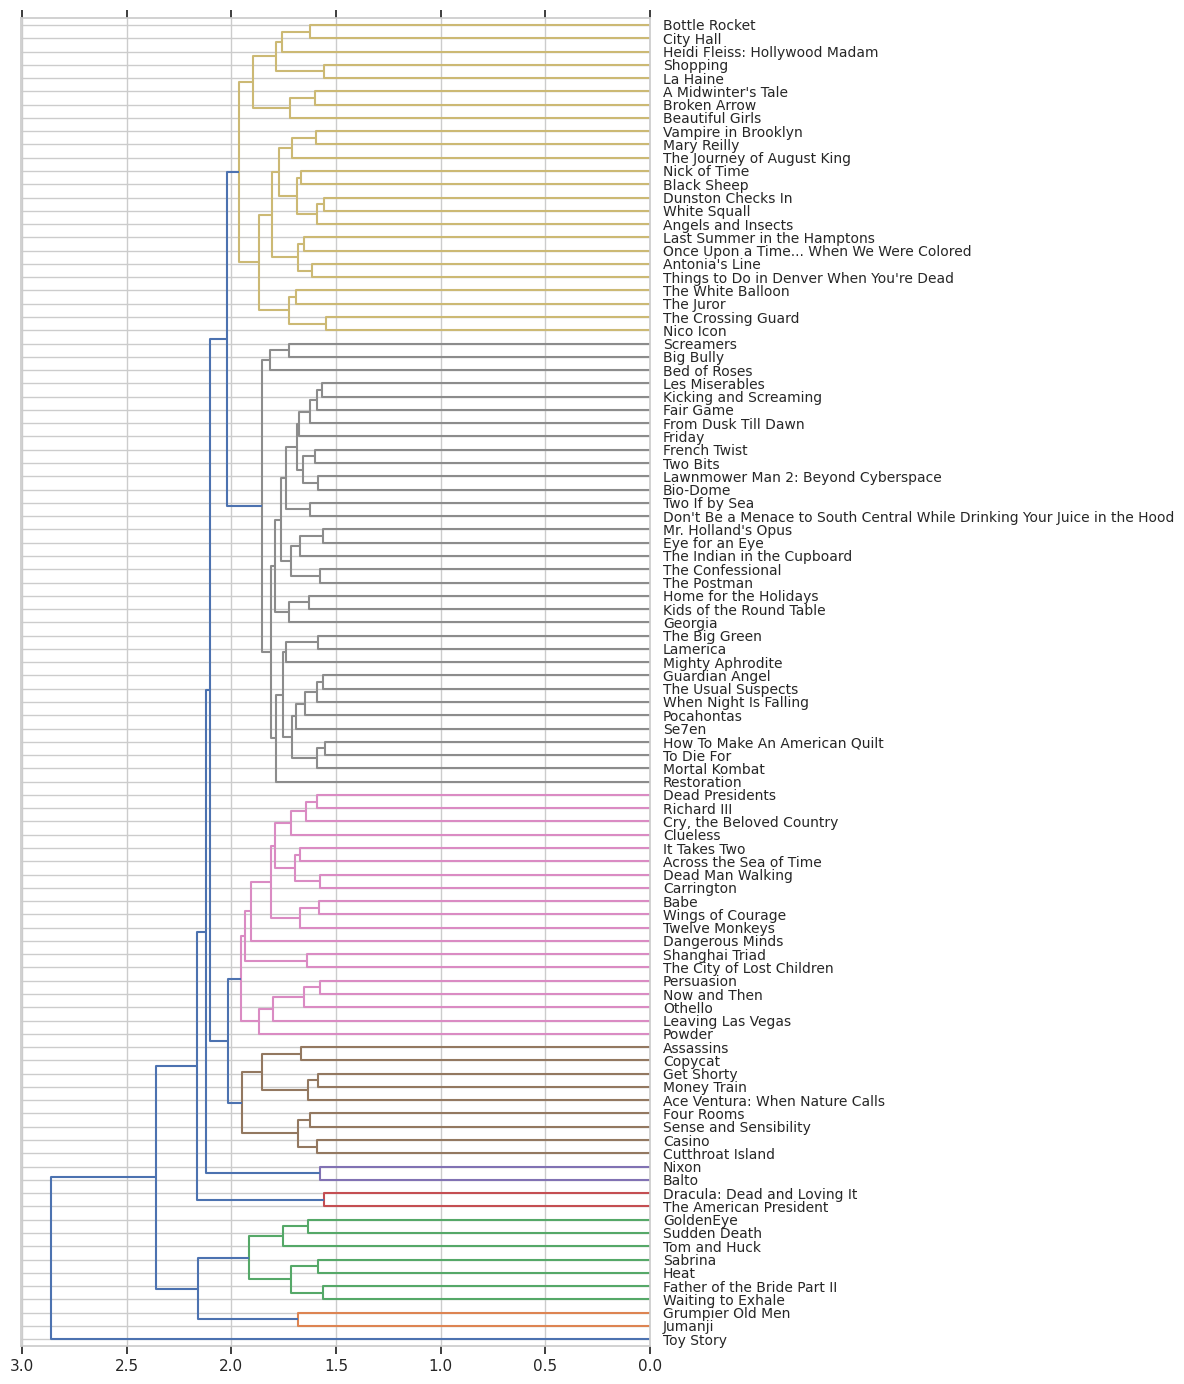

In [ ]:
import matplotlib.pyplot as plt
plot_hierarchical_clusters(linkage_matrix,
                           p=100,
                           movie_data=df,
                           figure_size=(12, 14))

# **Class imbalance**

1. **Data-Level Approaches** (Resampling)
Oversampling Minority Class:

Use techniques like SMOTE, ADASYN, or simple duplication.

Undersampling Majority Class:

Randomly remove examples from the majority class to balance the dataset.

Augmentation:

Use NLP-specific techniques like back translation, synonym replacement, EDA (Easy Data Augmentation).

2. **Algorithm-Level Approaches**
Class Weighting:

Most classifiers (e.g., LogisticRegression, SVM, XGBoost) support class_weight='balanced'.

Cost-sensitive Learning:

Penalize misclassification of minority class more than the majority class.

3. **Ensemble Methods**
Balanced Random Forest, EasyEnsemble, or RUSBoost work well in imbalanced settings.

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
import numpy as np

# Simulate imbalance: Only keep 2 classes, one large, one small

#We picked two categories from the 20 Newsgroups dataset:
#rec.autos → Class 0 (majority)
#talk.politics.mideast → Class 1 (minority)

categories = ['rec.autos', 'talk.politics.mideast']

data = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'))
X, y = data.data, data.target

# Creating manually imbalance dataset (e.g., only 20% of class 1)
#We manually reduced the number of examples from class 1 to 20% of its original size
np.random.seed(42)
idx_class0 = [i for i, label in enumerate(y) if label == 0]
idx_class1 = [i for i, label in enumerate(y) if label == 1]
idx_class1 = np.random.choice(idx_class1, size=int(0.2 * len(idx_class1)), replace=False)

# Combine indices
idx = np.concatenate([idx_class0, idx_class1])
X = [X[i] for i in idx]
y = [y[i] for i in idx]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize text
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Handle imbalance with oversampling
#We used Random Oversampling to duplicate minority class examples until both classes are equal in number.
#This helps the model see more examples of the rare class during training.
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train_vec, y_train)

# Train Logistic Regression with class_weight
#We trained a Logistic Regression classifier and added class_weight='balanced'.
#This tells the model to give more penalty to errors made on the minority class, making it take the rare class more seriously.
clf = LogisticRegression(class_weight='balanced', max_iter=1000)
clf.fit(X_resampled, y_resampled)

# Predict and evaluate
y_pred = clf.predict(X_test_vec)
print(classification_report(y_test, y_pred, target_names=data.target_names))


                       precision    recall  f1-score   support

            rec.autos       0.92      0.98      0.95       121
talk.politics.mideast       0.83      0.48      0.61        21

             accuracy                           0.91       142
            macro avg       0.87      0.73      0.78       142
         weighted avg       0.90      0.91      0.90       142



In [ ]:
# Simulate imbalance (retain only 20% of class 1)
np.random.seed(42)
idx_class0 = [i for i, label in enumerate(y) if label == 0]
idx_class1 = [i for i, label in enumerate(y) if label == 1]
idx_class1 = np.random.choice(idx_class1, size=int(0.2 * len(idx_class1)), replace=False)
idx = np.concatenate([idx_class0, idx_class1])
X = [X[i] for i in idx]
y = [y[i] for i in idx]

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Undersample majority class
rus = RandomUnderSampler(random_state=42)
X_under, y_under = rus.fit_resample(X_train_vec, y_train)

# Train
clf = LogisticRegression(max_iter=1000)
clf.fit(X_under, y_under)

# Evaluate
y_pred = clf.predict(X_test_vec)
print(classification_report(y_test, y_pred, target_names=data.target_names))

                       precision    recall  f1-score   support

            rec.autos       1.00      1.00      1.00       119
talk.politics.mideast       1.00      1.00      1.00         1

             accuracy                           1.00       120
            macro avg       1.00      1.00      1.00       120
         weighted avg       1.00      1.00      1.00       120

